# Centrality Measures

In [7]:
import pathlib

import jupedsim as jps
import matplotlib.pyplot as plt
import pedpy
import shapely
from matplotlib.patches import Circle
from shapely import Polygon
import networkx as nx
from jupedsim.internal.notebook_utils import animate, read_sqlite_file
%matplotlib inline
import plotly.graph_objects as go
from Py.centralityMeasures import centralityMeasuresAlgorithm

from Py.animation import animate
from Py.DangerSimulation import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [254]:
from shapely.geometry import Polygon, LineString
from shapely.ops import unary_union
import pedpy

# Define the complete area
complete_area = Polygon(
    [
        (0, 0),
        (0, 50),
        (50, 50),
        (50, 0),
    ]
)

# Define the obstacles
obstacles = [
    # railway wall
    Polygon([(4.9, 0.0), (5.1, 0.0 ), (5.1, 19.25), (4.9, 19.25)]),
    Polygon([(4.9, 20), (5.1, 20), (5.1, 24.25), (4.9,24.25)]),
    Polygon([(4.9, 25), (5.1, 25), (5.1, 29.25), (4.9, 29.25)]),
    Polygon([(4.9, 30), (5.1, 30), (5.1, 50), (4.9, 50)]),

    # exit 1
    Polygon([(5.1, 4), (5.6, 4), (5.6, 4.1), (5.1, 4.1)]),
    Polygon([(6.1, 4), (10.9, 4), (10.9, 1.5), (11.1, 1.5), (11.1, 4.1), (6.1, 4.1)]),
    Polygon([(10.9, 0), (11.1, 0), (11.1, 0.5), (10.9, 0.5)]),

    # big room 1
    Polygon([(6.9, 19.5),(6.9, 4), (10.9, 4), (10.9, 2), (20.1, 2), (20.1, 24.25), (6.9, 24.25), (6.9, 20.5),
             (7.1, 20.5), (7.1, 24.05), (19.9, 24.05), (19.9, 2.2), (11.1, 2.2), (11.1, 4.2), (7.1, 4.2), (7.1, 19.5)]),

    # big room 2
    Polygon([(6.9, 31), (6.9,26.25), (20.1, 26.25), (20.1, 38.1),(6.9, 38.1) ,(6.9, 33),
        (7.1, 33), (7.1, 37.9), (19.9, 37.9), (19.9, 26.45), (7.1, 26.45), (7.1, 31)]),

    # center upper left
    Polygon([(21.9, 19.9), (29.9, 19.9), (29.9, 23.9), (33.1,26.9), (33.1, 38.1), (21.9, 38.1)]),

    # center lower left
    Polygon([(21.9, 9.9), (33.1, 9.9), (33.1, 14.9), (29.9, 17.9), (21.9,17.9)]),

    # center upper right
    Polygon([(34.9, 26.9), (37.5, 24.9),(42.1, 24.9), (42.1, 36.1), (34.9,36.1)]),

    # center lower right
    Polygon([(34.9, 9.9), (42.1, 9.9), (42.1, 22.9), (37.5, 22.9), (37.5, 17.9), ( 34.9, 14.9)]),

    #center upper left wall
    Polygon([(33.1,38.1), (38.1, 38.1), (38.1, 37.9), (33.1, 37.9)]),

    #center upper right wall
    Polygon([(39.1,38.1), (42.1, 38.1), (42.1, 36.1), (41.9, 36.1), (41.9, 37.9), (39.1, 37.9)]),

    # bottom rooms
    Polygon([(21.9, 2), (49.9, 2), (49.9, 12.1), (46.1,12.1), (43.1, 7.9), (21.9, 7.9)]),

    # left center rooms
    Polygon([(44.1, 13.9), (49.9, 13.9), (49.9, 33), (44.1, 33)]),

    # left upper rooms
    Polygon([(44.1, 35), (50, 35), (50, 35.2), (44.3, 35.2), (44.3, 38.9), (44.1, 38.9)]),

    ## toilets rooms
    #room wall
    Polygon([(5.1, 39.9), (14.5, 39.9), (14.5, 40.1), (5.1, 40.1)]),
    #room bottom side entrance wall
    Polygon([(14.5, 39.9), (14.5, 45.1), (14.3, 45.1), (14.3, 39.9)]),
    ##toilets bottom wall
    #Polygon([(16.5, 39.9), (34.9, 39.9), (34.9, 40.1), (16.5, 40.1)]),
    ##toilest bottom side entrance wall
    #Polygon([(16.5, 39.9), (16.5, 43.1), (16.3, 43.1), (16.3, 39.9)]),
    ##toilest bottom interior wall
    #Polygon([(16.5, 42.9), (34.9, 42.9), (34.9, 43.1), (16.5, 43.1)]),
    ##toilest bottom side exit wall
    #Polygon([(34.9, 39.9), (34.9, 43.1), (35.1, 43.1), (35.1, 39.9)]),
    #bottom toilets
    Polygon([(16.5, 39.9), (35.1, 39.9), (35.1, 43.1), (16.5, 43.1)]),
    #upper toilets
    Polygon([(16.5, 45.9), (35.1, 45.9), (35.1, 50), (16.5, 50)]),

    ## exit 2
    # wall 1
    Polygon([(35.1, 40.9), (35.1, 39.9), (38.1, 39.9), (38.1, 40.1), (35.3, 40.1), (35.3, 40.9)]),
    # wall 2
    Polygon([(39.1, 39.9), (44.1, 39.9), (44.1, 44), (43.9, 44), (43.9, 40.1), (39.1, 40.1)]),
    # wall 3
    Polygon([(43.9, 47.9), (44.1, 47.9), (44.1, 45), (43.9, 45)]),
    # wall 4
    Polygon([(39.1, 47.9), (50, 47.9), (50, 48.1), (39.1, 48.1)]),
    # wall 5
    Polygon([(35.1, 47.9), (38.1, 47.9), (38.1, 48.1), (35.1, 48.1)]),

]

areas = dict()
areas[8] = Polygon([(34.9, 26.9), (37.5, 24.9),(42.1, 24.9), (42.1, 36.1), (34.9,36.1)])
areas[7] = Polygon([(34.9, 9.9), (42.1, 9.9), (42.1, 22.9), (37.5, 22.9), (37.5, 17.9), ( 34.9, 14.9)])

# Combine the obstacle polygons
obstacle = unary_union(obstacles)

# Compute the walkable area
walkable_area = pedpy.WalkableArea(
    shapely.difference(complete_area, obstacle)
)


<Axes: xlabel='x/m', ylabel='y/m'>

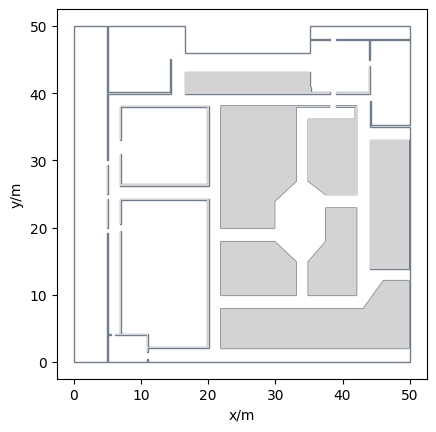

In [255]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_aspect("equal")
pedpy.plot_walkable_area(walkable_area=walkable_area, axes=ax)


In [200]:

for idx, (waypoint, distance) in waypoints.items():
    ax.plot(waypoint[0], waypoint[1], "ro")
    ax.annotate(
        f"{idx}",
        (waypoint[0], waypoint[1]),
        textcoords="offset points",
        xytext=(10, -15),
        ha="center",
    )
    circle = Circle(
        (waypoint[0], waypoint[1]), distance, fc="red", ec="red", alpha=0.1
    )
    ax.add_patch(circle)

x, y = Polygon(exit_polygon).exterior.xy
plt.fill(x, y, alpha=0.1, color="orange")
centroid = Polygon(exit_polygon).centroid
plt.text(centroid.x, centroid.y, "Exit", ha="center", va="center", fontsize=8)

x, y = distribution_polygon.exterior.xy
plt.fill(x, y, alpha=0.1, color="blue")
centroid = distribution_polygon.centroid
plt.text(centroid.x, centroid.y, "Start", ha="center", va="center", fontsize=10)

NameError: name 'waypoints' is not defined

In [65]:
specific_areas = dict()
specific_areas['A'] = Polygon([(0,0), (5,0), (5,5), (0,5)])
specific_areas['B'] = Polygon([(5,0), (10,0), (10,5), (5,5)])
specific_areas['C'] = Polygon([(10,0), (15,0), (15,5), (10,5)])
specific_areas['D'] = Polygon([(10,5), (15,5), (15,10), (10,10)])
specific_areas['E'] = Polygon([(5,5), (10,5), (10,10), (5,10)])
specific_areas['F'] = Polygon([(0,5), (5,5), (5,10), (0,10)])
specific_areas['G'] = Polygon([(0,10), (5,10), (5,15), (0,15)])
specific_areas['H'] = Polygon([(5,10), (10,10), (10,15), (5,15)])
specific_areas['I'] = Polygon([(10,10), (15,10), (15,15), (10,15)])

## Configuration of Simulation Scenarios

In [66]:
simulations = {}
percentages = [0]
total_agents = 10
for percentage in percentages:
    trajectory_file = f"../../sqlite_data/centrality_measures_percentage_{percentage}.sqlite"
    simulation = jps.Simulation(
        dt=0.005,
        model=jps.CollisionFreeSpeedModel(
            strength_neighbor_repulsion=2.6,
            range_neighbor_repulsion=0.1,
            range_geometry_repulsion=0.05,
        ),
        geometry=walkable_area.polygon,
        trajectory_writer=jps.SqliteTrajectoryWriter(
            output_file=pathlib.Path(trajectory_file),
        ),
    )
    simulations[percentage] = simulation

## Choosing the path


In [67]:
# Create the graph
G = nx.DiGraph()

# Nodos y sus niveles iniciales de riesgo (0 a 1)
nodes = {
    "A": 1.0, "B": 0.9, "C": 1.0,
    "D": 1.0, "E": 0.7, "F": 1.0,
    "G": 1.0, "H": 1.0, "I": 1.0,
}

# Agregar nodos al grafo
for node, risk in nodes.items():
    G.add_node(node, risk=risk)

# Definir las conexiones entre nodos
edges = [
    ("A", "B"), ("A", "F"), ("B", "A"), ("B", "E"), ("B", "C"),
    ("C", "B"), ("C", "D"), ("D", "I"), ("D", "E"), ("D", "C"),
    ("E", "D"), ("E", "F"), ("E", "B"), ("E", "H"), ("F", "A"),
    ("F", "E"), ("F", "G"), ("G", "F"), ("G", "H"), ("H", "E"),
    ("H", "G"), ("H", "I"),
]

# Agregar las aristas con un costo fijo (se puede ajustar)
G.add_edges_from([(u, v, {"cost": 3}) for u, v in edges])

# Parameters for calculation
sources = ["A"]  # Source nodes
targets = ["I"]  # Target nodes

# Calculate all efficient paths between source-target pairs
gamma = 1.2  # Time tolerance factor

_, _, best_paths = centralityMeasuresAlgorithm(G, sources, targets, gamma)

print(best_paths[sources[0]])

{'best_path': ['A', 'B', 'E', 'D', 'I'], 'max_centrality_score': 1.6666666666666665}


## Outlining Agent Journeys

In [68]:
def differentGraphs(start, end, paths, waypoint_ids, exit_id):
    """
    Creates a journey description for an agent based on the best path between a start and an end node.

    Args:
        start (str): Starting node in the graph.
        end (str): Ending node in the graph.
        paths (dict): Dictionary containing the best paths for each source node.
                      Structure: {source: {"best_path": [path_nodes], ...}, ...}
        waypoint_ids (dict): Dictionary mapping node IDs to waypoint IDs in the simulation.
                             Structure: {node_id: waypoint_id, ...}.
        exit_id (int): ID of the exit stage in the simulation.

    Returns:
        jps.JourneyDescription: The journey description for the agent.
    """
    path = paths[start]["best_path"]

    if not path:
        raise ValueError(f"No valid path found from {start} to {end}.")

    # Map the graph nodes in the path to waypoint IDs, excluding start and end nodes
    needed_waypoints = [waypoint_ids[node] for node in path[1:-1]]

    # Create the journey description
    journey = jps.JourneyDescription([*needed_waypoints, exit_id])

    # Set transitions between waypoints
    for idx, waypoint in enumerate(needed_waypoints):
        next_waypoint = exit_id if idx == len(needed_waypoints) - 1 else needed_waypoints[idx + 1]
        journey.set_transition_for_stage(
            waypoint, jps.Transition.create_fixed_transition(next_waypoint)
        )

    return journey

In [69]:
def set_journeys(simulation, start, end):
    """
    Configures agent journeys in the simulation.

    Args:
        simulation (jps.Simulation): The simulation instance.
        start (str): Starting node in the graph.
        end (str): Ending node in the graph.

    Returns:
        tuple: Journey ID and the dictionary of waypoint IDs.
    """
    # Add the exit stage to the simulation
    exit_id = simulation.add_exit_stage(exit_polygon)

    # Map nodes to waypoint IDs
    waypoint_ids = {}
    for node, (waypoint, distance) in waypoints.items():
        waypoint_ids[node] = simulation.add_waypoint_stage(waypoint, distance)

    # Create the journey based on the best paths
    journey = differentGraphs(start, end, best_paths, waypoint_ids, exit_id)

    # Add the journey to the simulation
    journey_id = simulation.add_journey(journey)

    return journey_id, waypoint_ids

## Allocate Agents

In [70]:
positions = jps.distribute_by_number(
    polygon=distribution_polygon,
    number_of_agents=total_agents,
    distance_to_agents=0.4,
    distance_to_polygon=0.7,
    seed=45131502,
)

## Launching the Simulation

In [71]:
def simulate_risk_per_frame(
    G: nx.DiGraph,
    total_frames: int,
    propagation_chance=0.3,
    increase_chance=0.2,
):
    """
    Genera niveles de riesgo por frame para sincronizar con la simulación de agentes.

    Parámetros:
        G (nx.DiGraph): Grafo con áreas y conexiones.
        total_frames (int): Número total de frames de la simulación.
        propagation_chance (float): Probabilidad de propagar riesgo.
        increase_chance (float): Probabilidad de incrementar riesgo.

    Retorna:
        dict: Riesgos por frame en formato {frame: {area: riesgo}}.
    """
    risks_per_frame = {}

    for frame in range(total_frames):
        # Actualizar riesgos en el grafo
        update_risk(G, propagation_chance, increase_chance)

        # Guardar riesgos actuales
        risks_per_frame[frame] = {node: G.nodes[node]["risk"] for node in G.nodes}

    return risks_per_frame

# Simular riesgos
# risk_per_frame = simulate_risk_per_frame(G, total_frames=3000)



In [72]:
trajectory_files = {}
for percentage, simulation in simulations.items():
    journey_id, waypoint_id = set_journeys(
        simulation, sources[0], targets[0]  # 0 -> start, 5 -> exit
    )

    next_node = best_paths[sources[0]]["best_path"][1]
    first_waypoint_id = waypoint_id[next_node]

    num_items = int(len(positions) * (percentage / 100.0))

    for position in positions[num_items:]: # second half of positions
        simulation.add_agent(
            jps.CollisionFreeSpeedModelAgentParameters(
                position=position,
                journey_id=journey_id,
                stage_id=first_waypoint_id,
            )
        )

    every_nth_frame = 50 # the default value of every_nth_frame
    propagation_chance=0.005
    increase_chance=0.05
    risks_per_frame = dict()

    # Guardar riesgos iniciales
    risks_per_frame[0] = {node: G.nodes[node]["risk"] for node in G.nodes}

    while simulation.agent_count() > 0:
        simulation.iterate()
        if simulation.iteration_count() % every_nth_frame == 0:
            update_risk(G, propagation_chance, increase_chance)
            # Guardar riesgos actuales
            risks_per_frame[simulation.iteration_count()] = {node: G.nodes[node]["risk"] for node in G.nodes}

    trajectory_file = f"../../sqlite_data/centrality_measures_percentage_{percentage}.sqlite"
    trajectory_files[percentage] = trajectory_file

In [73]:
for frame, nodes in risks_per_frame.items():
    for node, risk in nodes.items():
        print(f"{frame}, {node}: {risk}")

0, A: 1.0
0, B: 0.9
0, C: 1.0
0, D: 1.0
0, E: 0.7
0, F: 1.0
0, G: 1.0
0, H: 1.0
0, I: 1.0
50, A: 1.0
50, B: 0.9
50, C: 1.0
50, D: 1.0
50, E: 0.7
50, F: 1.0
50, G: 1.0
50, H: 1.0
50, I: 1.0
100, A: 1.0
100, B: 0.9
100, C: 1.0
100, D: 1.0
100, E: 0.7
100, F: 1.0
100, G: 1.0
100, H: 1.0
100, I: 1.0
150, A: 1.0
150, B: 0.9
150, C: 1.0
150, D: 1.0
150, E: 0.5
150, F: 1.0
150, G: 1.0
150, H: 0.8
150, I: 1.0
200, A: 1.0
200, B: 0.9
200, C: 1.0
200, D: 1.0
200, E: 0.5
200, F: 1.0
200, G: 1.0
200, H: 0.8
200, I: 1.0
250, A: 1.0
250, B: 0.9
250, C: 1.0
250, D: 1.0
250, E: 0.5
250, F: 1.0
250, G: 1.0
250, H: 0.8
250, I: 1.0
300, A: 1.0
300, B: 0.9
300, C: 1.0
300, D: 1.0
300, E: 0.5
300, F: 1.0
300, G: 1.0
300, H: 0.8
300, I: 1.0
350, A: 1.0
350, B: 0.9
350, C: 1.0
350, D: 1.0
350, E: 0.5
350, F: 1.0
350, G: 1.0
350, H: 0.8
350, I: 1.0
400, A: 1.0
400, B: 0.9
400, C: 1.0
400, D: 1.0
400, E: 0.5
400, F: 1.0
400, G: 1.0
400, H: 0.8
400, I: 1.0
450, A: 0.8
450, B: 0.9
450, C: 1.0
450, D: 1.0
450, E:

## Visualizing Agent Pathways

In [74]:
agent_trajectories = {}
for percentage in percentages:
    trajectory_file = trajectory_files[percentage]
    agent_trajectories[percentage], walkable_area = read_sqlite_file(
        trajectory_file
    )
    animate(
        agent_trajectories[percentage],
        walkable_area,
        title_note=f"Percentage using the shortest path: {percentage}%",
        risks_per_frame=risks_per_frame,
        specific_areas=specific_areas
    ).show()

In [ ]:
def calculate_density_average_classic(
    bounds: Tuple[float, float, float, float],
    dx: float,
    nframes: int,
    X: npt.NDArray[np.float64],
    Y: npt.NDArray[np.float64],
) -> npt.NDArray[np.float64]:
    """Calculate classical method

    Density = mean_time(N/A_i)
    """
    geominX, geominY, geomaxX, geomaxY = bounds
    xbins = np.arange(geominX, geomaxX + dx, dx)
    ybins = np.arange(geominY, geomaxY + dx, dx)
    area = dx * dx
    ret = stats.binned_statistic_2d(
        X,
        Y,
        None,
        "count",
        bins=[xbins, ybins],
    )
    return np.array(np.nan_to_num(ret.statistic.T)) / nframes / area

In [ ]:
def plot_classical_density_profile(data, walkable_area, name, dx, rho_max):
    # Unpack the bounds of the walkable area (min and max coordinates).
    geominX, geominY, geomaxX, geomaxY = walkable_area.bounds

    # Create a bold title for the subplot using the given name.
    title = f"<b>{name}</b>"

    # Create a figure with a single subplot and set its title.
    # Note: The subplot_titles parameter is given as a list with one title.
    fig = make_subplots(rows=1, cols=1, subplot_titles=[title])

    # Generate the x and y bin edges using the bounds of the walkable area and the grid size dx.
    xbins = np.arange(geominX, geomaxX + dx, dx)
    ybins = np.arange(geominY, geomaxY + dx, dx)

    # Get the x and y coordinates of the exterior of the walkable area's polygon.
    # These coordinates represent the wall boundaries.
    x, y = walkable_area.polygon.exterior.xy
    x = list(x)
    y = list(y)

    # Create a Heatmap trace using the computed bins and density data.
    # zmin is set to 0 and zmax is set to the provided rho_max to ensure consistent color scaling.
    # The hovertemplate shows the density and position; note that there is an extra closing brace in the template
    # which might be unintentional: "%{y:.2f}}" -- you might want to correct that.
    heatmap = go.Heatmap(
        x=xbins,
        y=ybins,
        z=data,
        zmin=0,
        zmax=rho_max,
        name=title,
        connectgaps=False,
        zsmooth=None,
        hovertemplate="Density: %{z:.2f}<br>\nPos: (%{x:.2f}, %{y:.2f})",  # Adjusted hovertemplate formatting
        colorbar=dict(title="Density"),
        colorscale="Jet",
    )

    # Add the heatmap trace to the figure.
    fig.add_trace(heatmap)

    # Create a Scatter trace for the geometry walls using the polygon's exterior coordinates.
    # This draws the outline of the walkable area.
    line = go.Scatter(
        x=x,
        y=y,
        mode="lines",
        name="wall",
        showlegend=False,
        line=dict(
            width=3,
            color="white",
        ),
    )

    # Add the wall trace to the figure.
    fig.add_trace(line)

    # Return the figure containing both the heatmap and the wall geometry.
    return fig

In [74]:
# Define the spatial resolution for the density calculation (grid size).
dx = 0.5

# Initialize the maximum density value (rho_max) to -1.
# This variable will be updated with the maximum density value computed from the data.
rho_max = -1

# Create a figure with a 2x2 grid of subplots.
# The titles for each subplot are taken from the keys of the 'agent_trajectories' dictionary.
fig = make_subplots(
    rows=2, cols=2, subplot_titles=list(agent_trajectories.keys())
)

# Iterate over each simulation mode in 'agent_trajectories'.
for count, mode in enumerate(agent_trajectories):
    # Retrieve the trajectory data for the current simulation mode.
    trajectories = agent_trajectories[mode]

    # Calculate the average density using a classical method.
    # The function uses:
    #   - The bounds of the walkable area.
    #   - The grid resolution (dx).
    #   - The maximum number of frames (nframes) from the trajectory data.
    #   - The x and y positions from the trajectory data.
    data = calculate_density_average_classic(
        walkable_area.bounds,
        dx,
        nframes=trajectories.data["frame"].max(),
        X=trajectories.data["x"],
        Y=trajectories.data["y"],
    )

    # Update the maximum density (rho_max) by comparing the current maximum in the data with the previous rho_max.
    rho_max = max(np.max(data), rho_max)

    # Plot the classical density profile using the calculated data.
    # The function takes:
    #   - The density data.
    #   - The walkable area.
    #   - The name of the current mode (obtained from 'modes_names').
    #   - The grid resolution (dx).
    #   - The maximum density value (rounded up).
    ind_fig = plot_classical_density_profile(
        data, walkable_area, modes_names[mode], dx, math.ceil(rho_max)
    )

    # Determine the subplot (row and column) based on the index (count):
    if count < 2:
        # For the first two modes, assign to the first row.
        # count=0 -> subplot at row 1, col 1; count=1 -> subplot at row 1, col 2.
        row = 1
        col = count + 1
    else:
        # For the next two modes, assign to the second row.
        # count=2 -> subplot at row 2, col 1; count=3 -> subplot at row 2, col 2.
        row = 2
        col = (count - 2) + 1

    # Add each trace from the individual density profile figure to the appropriate subplot in the main figure.
    for trace in ind_fig.data:
        fig.add_trace(trace, row=row, col=col)

    # Update the x-axis for the current subplot with a title.
    fig.update_xaxes(title_text="X [m]", row=row, col=col)
    # Update the y-axis for the current subplot with a title and set its scale to match the x-axis.
    fig.update_yaxes(title_text="Y [m]", row=row, col=col, scaleanchor="x", scaleratio=1)

# Display the final figure with all the subplots.
fig.show()